# Statistical Analysis of Binary Biometric Embeddings

In this notebook, we analyze the statistical properties of binary biometric embeddings extracted from face images. We explore the distribution of Hamming weights, compute Hamming distances between different users, and evaluate system performance by calculating the False Acceptance Rate (FAR) and False Rejection Rate (FRR). These analyses help in understanding the discriminative power and robustness of the biometric system.


In [ ]:
import numpy as np
from scipy.stats import norm
from plotly.subplots import make_subplots
from err_calc_npy import load_float_embeddings, binarize_all, generar_pares, calcular_distancias, evaluar_umbral, graficar_interactivo, compute_err, encontrar_eer

In [7]:
def epsilon(k, n, t):
    """
    Calculate the epsilon value based on the given parameters.
    
    Parameters:
    k (int): Code dimension.
    n (int): Code length.
    t (float): number of corrected errors.
    
    Returns:
    float: The calculated epsilon value.
    """
    if k > n or k < 0 or n <= 0:
        raise ValueError("Invalid values for k and n.")
    
    # Calculate epsilon using the formula
    p = (t/n)
    ϵ = -1 + k/n - p*np.log2(p) - (1 - p)*np.log2(1 - p)
    return ϵ
def gauss(x,mu, sigma):
    """
    Gaussian function for plotting.
    
    Parameters:
    x (array): Input values.
    mu (float): Mean of the Gaussian.
    sigma (float): Standard deviation of the Gaussian.
    a (float): Amplitude of the Gaussian.
    
    Returns:
    array: Gaussian values for the input x.
    """
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*((x-mu)/sigma)**2)
    

In [57]:
def binarize(data_f: dict, thresholds: list):
    """
    Binarize the float embeddings based on a threshold.
    
    Parameters:
    data_f (dict): Dictionary containing float embeddings.
    threshold (float): Threshold for binarization.
    
    Returns:
    dict: Dictionary with binarized embeddings.
    """
    thresholds = np.sort(np.array(thresholds))
    bin_length = int(np.ceil(np.log2(len(thresholds) + 1)))
    data_b = {}
    for key, value in data_f.items():
        bin_indices = []
        for i in range(len(value)):
            interval_indices = np.searchsorted(thresholds, value[i], side='right')
            #print(np.array(list(np.binary_repr(interval_indices[4], width=bin_length)), dtype=int) )
            bin_index = np.concatenate([np.array(list(np.binary_repr(idx, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            bin_indices.append(bin_index.tolist())

        data_b[key] = np.stack(bin_indices, axis = 0)
    return data_b

Load Dataset

In [46]:
model = 512
float_dim = model

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

0.044188455
-0.0007114266


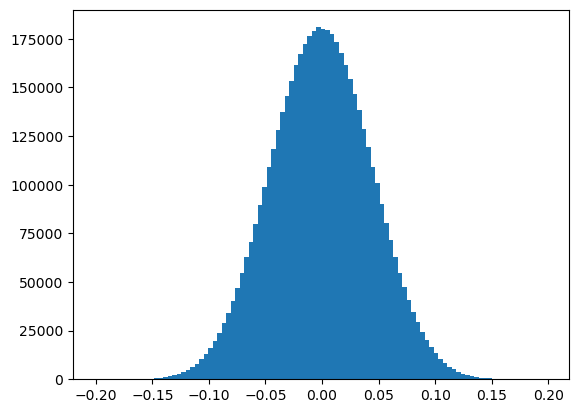

In [42]:
plt.hist(lista, bins = 100)
print(sigma)
print(mu)

In [47]:
# Load embeddings and binarize data

bits = 3 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 140711.86it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 148266.15it/s]


In [48]:

thresholds = [norm.ppf(1-1/(2**bits)*i) for i in range(1, 2**bits)]
print(thresholds)

[np.float64(1.5341205443525463), np.float64(1.1503493803760079), np.float64(0.887146559018876), np.float64(0.6744897501960817), np.float64(0.4887764111146695), np.float64(0.31863936396437514), np.float64(0.1573106846101707), np.float64(0.0), np.float64(-0.1573106846101707), np.float64(-0.31863936396437514), np.float64(-0.4887764111146695), np.float64(-0.6744897501960817), np.float64(-0.887146559018876), np.float64(-1.1503493803760079), np.float64(-1.5341205443525463)]


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18327/3868211995.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_18327/3868211995.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_18327/3868211995.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.lin

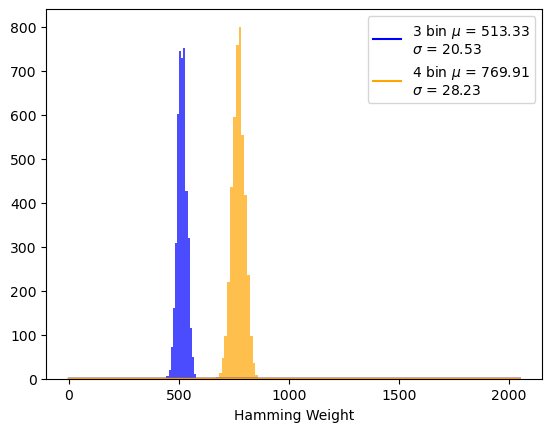

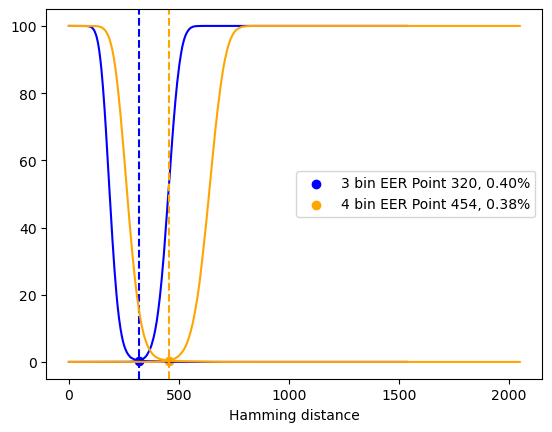

In [49]:
from matplotlib import pyplot as plt

x, y = np.histogram(weights_sample3, bins=15)
mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
plt.hist(weights_sample3, bins=15, alpha=0.7, color='blue')
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
x, y = np.histogram(weights_sample4, bins=15)
mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
plt.hist(weights_sample4, bins=15, alpha=0.7, color = "orange")
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='orange', label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
plt.legend()
#plt.xlim(500, 1500)
plt.xlabel('Hamming Weight')
plt.show()

plt.plot(thresholds3, fars3, color='blue')
plt.plot(thresholds3, frrs3, color='blue')
plt.axvline(eer_th3, color='blue', linestyle='--')
plt.scatter([eer_th3], [eer_val3], color='blue', label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
plt.plot(thresholds4, fars4, color='orange')
plt.plot(thresholds4, frrs4, color='orange')
plt.axvline(eer_th4, color='orange', linestyle='--')
plt.scatter([eer_th4], [eer_val4], color='orange', label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
plt.xlabel('Hamming Weight Threshold')
#plt.xlim(100, 1000)
plt.legend()
plt.xlabel("Hamming distance")
plt.show()



In [59]:
model = 128
float_dim = model

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [ ]:
# Load embeddings and binarize data

bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits+1)*i)*sigma+mu for i in range(1, bits+1)]
print(thresholds)

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds2 = list(range(0, bin_length + 1))
fars2, frrs2 = evaluar_umbral(dist_g, dist_i, thresholds2)
eer_th2, eer_val2 = encontrar_eer(thresholds2, fars2, frrs2)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample2 = weights  # Use a sample for speed

bits = 3 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits+1)*i)*sigma+mu for i in range(1, bits+1)]
print(thresholds)


data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits+1)*i)*sigma+mu for i in range(1, bits+1)]
print(thresholds)


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 143340.51it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 165116.88it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 133091.83it/s]


In [53]:
data_b

{'1539.npy': array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
         0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
         1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
         0, 1

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18327/1215395196.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='green', label=f"2 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_18327/1215395196.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace

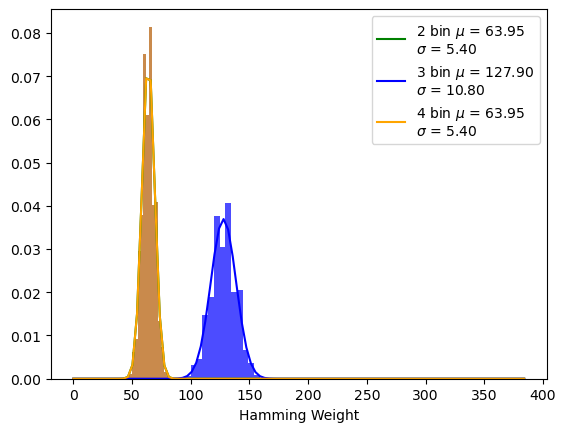

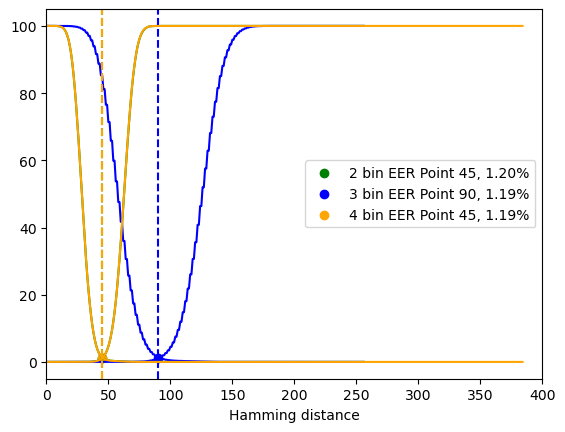

In [72]:
from matplotlib import pyplot as plt

x, y = np.histogram(weights_sample2, bins=15)
mu = np.mean(weights_sample2)
sigma = np.std(weights_sample2)
plt.hist(weights_sample2, bins=15, alpha=0.7, color='blue', density=True)
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='green', label=f"2 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
x, y = np.histogram(weights_sample3, bins=15)
mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
plt.hist(weights_sample3, bins=15, alpha=0.7, color='blue', density=True)
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
x, y = np.histogram(weights_sample4, bins=15)
mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
plt.hist(weights_sample4, bins=15, alpha=0.7, color = "orange", density=True)
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='orange', label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
plt.legend()

plt.xlabel('Hamming Weight')
plt.show()

plt.plot(thresholds2, fars2, color='green')
plt.plot(thresholds2, frrs2, color='green')
plt.axvline(eer_th2, color='green', linestyle='--')
plt.scatter([eer_th2], [eer_val2], color='green', label='2 bin EER Point '+f"{eer_th2}, {eer_val2:.2f}%")
plt.plot(thresholds3, fars3, color='blue')
plt.plot(thresholds3, frrs3, color='blue')
plt.axvline(eer_th3, color='blue', linestyle='--')
plt.scatter([eer_th3], [eer_val3], color='blue', label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
plt.plot(thresholds4, fars4, color='orange')
plt.plot(thresholds4, frrs4, color='orange')
plt.axvline(eer_th4, color='orange', linestyle='--')
plt.scatter([eer_th4], [eer_val4], color='orange', label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
plt.xlabel('Hamming Weight Threshold')
plt.xlim(00, 400)
plt.legend()
plt.xlabel("Hamming distance")
plt.show()


In [ ]:
# Load embeddings and binarize data
model = 128
float_dim = model
bits = 3

if bits == 4:
    t1 = 0.4
    t2 = 1

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)
lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)
from scipy.stats import norm
#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)
if bits == 3:
    t1 = norm.ppf(1-1/3)*sigma + mu
    t2 = None
if bits == 4:
    t1 = norm.ppf(1-2/5)*sigma + mu
    t2 = norm.ppf(1-1/5)*sigma + mu

data_b = binarize_all(data_f, bits, t1, t2) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


float_dim = model
bits = 4 #3 or 4


dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)
lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)
mu = np.mean(lista)
sigma = np.std(lista)
if bits == 3:
    t1 = norm.ppf(1-1/3)*sigma + mu
    t2 = None
if bits == 4:
    t1 = norm.ppf(1-2/5)*sigma + mu
    t2 = norm.ppf(1-1/5)*sigma + mu
data_b = binarize_all(data_f, bits, t1, t2) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 138655.46it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 151302.46it/s]


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_8194/682612097.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_8194/682612097.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_8194/682612097.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.linspace(

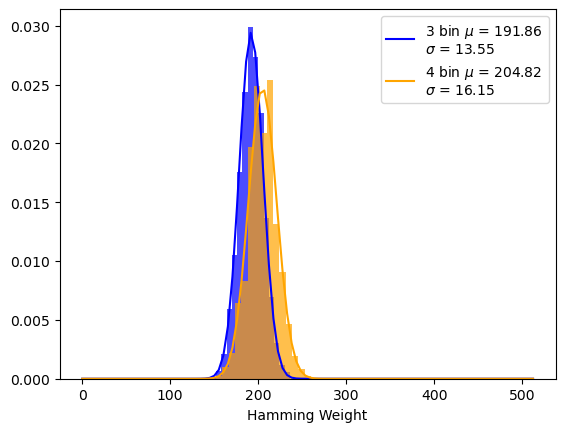

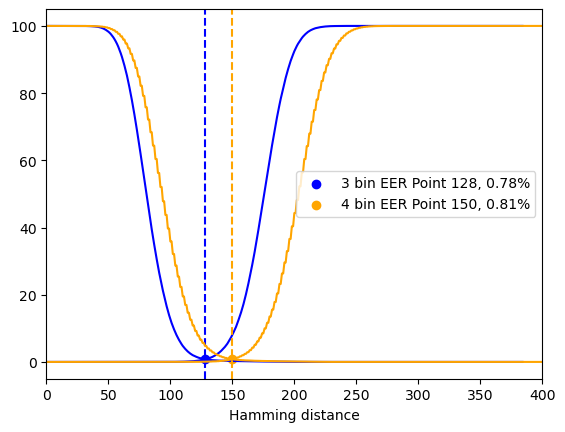

In [ ]:
from matplotlib import pyplot as plt

x, y = np.histogram(weights_sample3, bins=15)
mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
plt.hist(weights_sample3, bins=15, alpha=0.7, color='blue', density=True)
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='blue', label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
x, y = np.histogram(weights_sample4, bins=15)
mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
plt.hist(weights_sample4, bins=15, alpha=0.7, color = "orange", density=True)
plt.plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color='orange', label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
plt.legend()

plt.xlabel('Hamming Weight')
plt.show()

plt.plot(thresholds3, fars3, color='blue')
plt.plot(thresholds3, frrs3, color='blue')
plt.axvline(eer_th3, color='blue', linestyle='--')
plt.scatter([eer_th3], [eer_val3], color='blue', label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
plt.plot(thresholds4, fars4, color='orange')
plt.plot(thresholds4, frrs4, color='orange')
plt.axvline(eer_th4, color='orange', linestyle='--')
plt.scatter([eer_th4], [eer_val4], color='orange', label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
plt.xlabel('Hamming Weight Threshold')
plt.xlim(00, 400)
plt.legend()
plt.xlabel("Hamming distance")
plt.show()



0.022072190099602804 0.07406842130758524


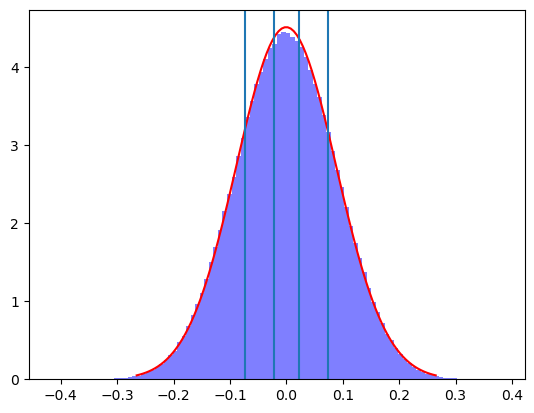

In [ ]:
print(t1, t2)
lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)
mu = np.mean(lista)
sigma = np.std(lista)
bits = 4
if bits == 3:
    t1 = norm.ppf(1-1/3)*sigma + mu
    t2 = None
if bits == 4:
    t1 = norm.ppf(1-2/5)*sigma + mu
    t2 = norm.ppf(1-1/5)*sigma + mu
plt.hist(lista, bins  =100, density=True, alpha=0.5, color='blue', label='Histogram of Weights')
plt.plot(np.linspace(mu - 3*sigma, mu + 3*sigma, 100), gauss(np.linspace(mu - 3*sigma, mu + 3*sigma, 100), mu, sigma), label='Gaussian Fit', color='red')
plt.axvline(-t1)
plt.axvline(-t2)
plt.axvline(t1)
plt.axvline(t2)
plt.show()